In [1]:
# Configs

embedding_type = "perf" # time or perf

In [2]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [3]:
dataset = pd.read_csv(f"../../dataset/{embedding_type}/dataset.csv")
dataset = pd.get_dummies(dataset)

dataset.head()

labels = [
    "label_strings",
    "label_implementation",
    "label_greedy",
    "label_brute_force",
    "label_dp",
    "label_divide_and_conquer",
    "label_graphs",
    "label_binary_search",
    "label_math",
    "label_sortings",
    "label_shortest_paths",
]
print_labels = list(map(lambda l: (l.split('_', 1)[1].replace('_', ' ')), labels))

dataset, _ = train_test_split(dataset, test_size=0.1, random_state=42, shuffle=True)

dataset.reset_index(drop=True, inplace=True)
dataset_features = dataset.copy().drop(labels, axis=1)
dataset_labels = pd.concat([dataset.copy().pop(x) for x in labels], axis=1)

In [4]:
dataset.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.9,12555.121301,-3.122834e+02,1.0,357724.101139,261.633149,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,12179.372617,6.077864e+00,1.0,355883.567059,2.000001,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,12321.103807,2.518772e+00,1.0,354974.904409,663.964393,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,12185.156773,4.342988e+01,1.0,355354.369560,636.262730,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.0,12246.041599,1.989060e+01,1.0,355609.622317,34.241857,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349,0.6,12332.719967,1.306533e+02,1.0,355661.201827,0.042989,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
5350,0.9,12537.804792,-2.816805e+02,1.0,358095.356104,43.928507,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
5351,2.0,12400.910456,3.882239e-02,1.0,356256.013131,436.178066,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
5352,0.1,12259.142873,-1.111425e+03,1.0,355157.420218,0.326510,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0


In [5]:
dataset.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.9,12555.121301,-3.122834e+02,1.0,357724.101139,261.633149,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,12179.372617,6.077864e+00,1.0,355883.567059,2.000001,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,12321.103807,2.518772e+00,1.0,354974.904409,663.964393,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,12185.156773,4.342988e+01,1.0,355354.369560,636.262730,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.0,12246.041599,1.989060e+01,1.0,355609.622317,34.241857,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5349,0.6,12332.719967,1.306533e+02,1.0,355661.201827,0.042989,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
5350,0.9,12537.804792,-2.816805e+02,1.0,358095.356104,43.928507,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
5351,2.0,12400.910456,3.882239e-02,1.0,356256.013131,436.178066,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
5352,0.1,12259.142873,-1.111425e+03,1.0,355157.420218,0.326510,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0


In [6]:
ss = []
ss_dict = {}
max_dict = 0

for i in range(len(dataset)):
    s = ""
    for l in labels:
        if dataset[l][i] > 0:
            s = s + l[6:] + " "
    if ss_dict.get(s, None) != None:
        ss.append(ss_dict[s])
    else:
        ss.append(max_dict)
        ss_dict[s] = max_dict
        max_dict = max_dict + 1
    
d = np.array(ss)

In [7]:
print(ss_dict) 
print(d)
print(max_dict)

{'implementation ': 0, 'implementation brute_force math ': 1, 'greedy brute_force ': 2, 'strings implementation ': 3, '': 4, 'greedy sortings ': 5, 'strings ': 6, 'strings implementation greedy sortings ': 7, 'greedy math ': 8, 'strings greedy ': 9, 'greedy divide_and_conquer binary_search math ': 10, 'implementation math ': 11, 'implementation graphs shortest_paths ': 12, 'strings implementation brute_force ': 13, 'greedy dp math ': 14, 'greedy brute_force math ': 15, 'greedy dp ': 16, 'divide_and_conquer binary_search math ': 17, 'math ': 18}
[0 1 2 ... 5 8 0]
19


In [8]:
X = dataset_features
y = d
target_names = list(ss_dict.keys())

print(target_names)

['implementation ', 'implementation brute_force math ', 'greedy brute_force ', 'strings implementation ', '', 'greedy sortings ', 'strings ', 'strings implementation greedy sortings ', 'greedy math ', 'strings greedy ', 'greedy divide_and_conquer binary_search math ', 'implementation math ', 'implementation graphs shortest_paths ', 'strings implementation brute_force ', 'greedy dp math ', 'greedy brute_force math ', 'greedy dp ', 'divide_and_conquer binary_search math ', 'math ']


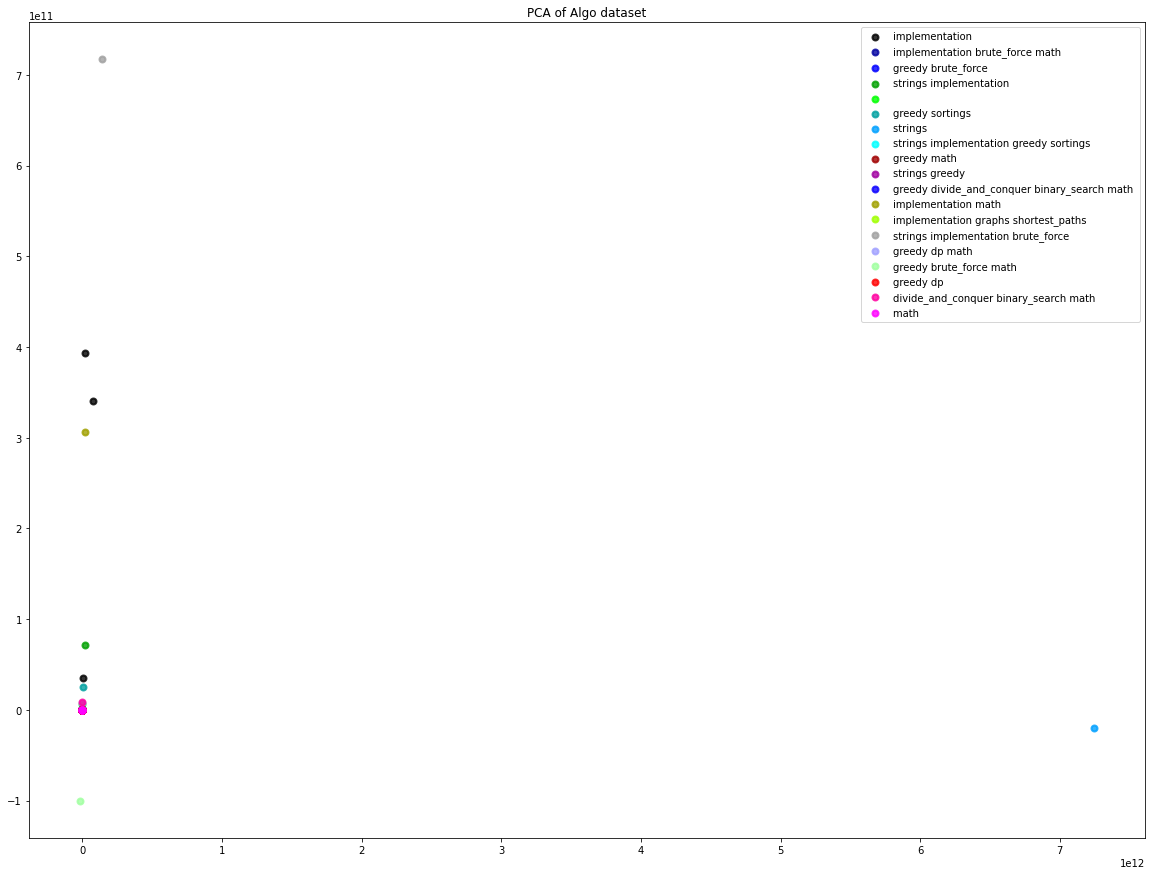

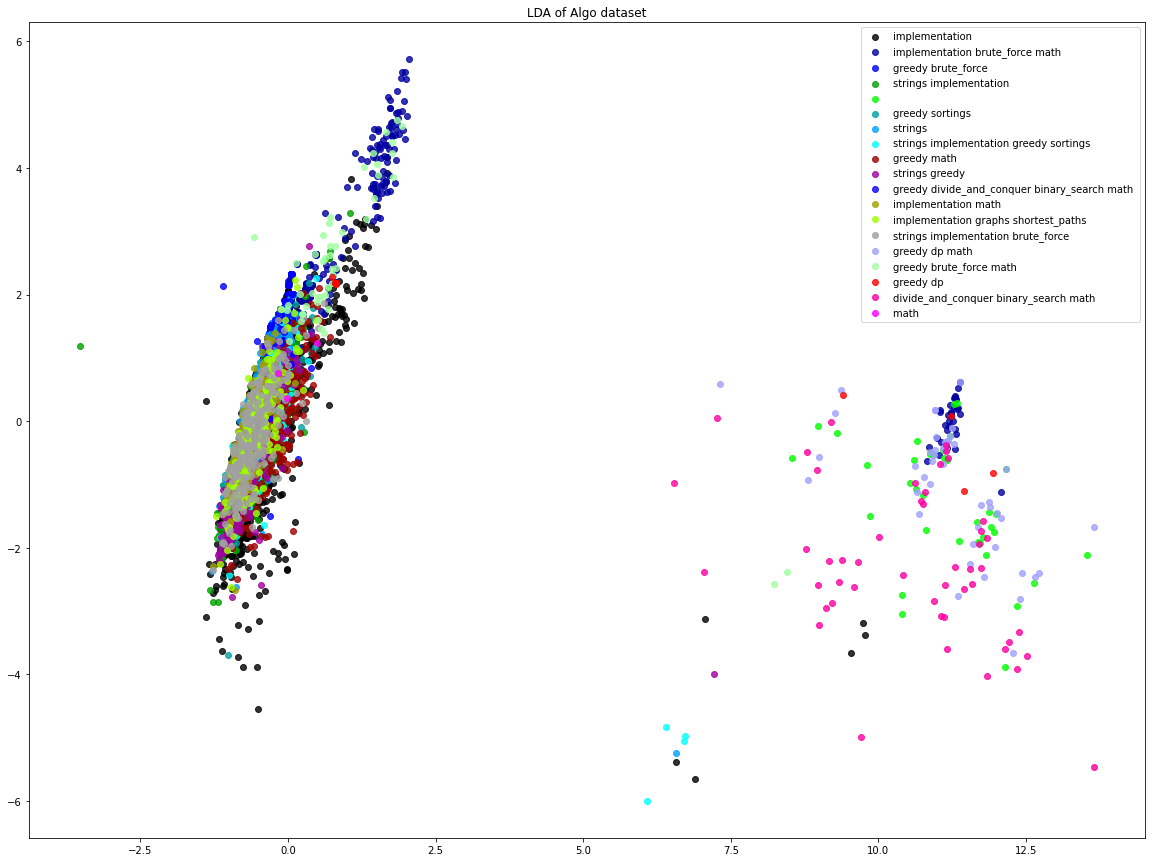

In [9]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(figsize=(20, 15))
colors = ['#000000', '#0000a0', '#0000ff', '#00a000', '#00ff00', '#00a0a0',
         '#00a0ff', '#00ffff', '#a00000', '#a000a0', '#0a00ff', '#a0a000',
         '#a0ff00', '#a0a0a0', '#a0a0ff', '#a0ffa0', '#ff0000', '#ff00a0',
         '#ff00ff',]
lw = 2

for color, i, target_name in zip(colors, range(19), target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(labels=target_names, loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Algo dataset")

plt.figure(figsize=(20, 15))
for color, i, target_name in zip(colors, range(19), target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(labels=target_names, loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of Algo dataset")

plt.show()